In [101]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
from numpy.fft import fft,ifft
import numpy as np

In [102]:
def presentable (a):
    return a[:len(a)//2]

In [126]:
# reading the data
samplerate, data = wavfile.read("./sample.wav")
signal, channel2 = data.T[0], data.T[1]
print(samplerate,data)
print(signal)

48000 [[  0   0]
 [  0   0]
 [  0   0]
 ...
 [  6  -2]
 [ 17 -20]
 [  5 -24]]
[ 0  0  0 ...  6 17  5]


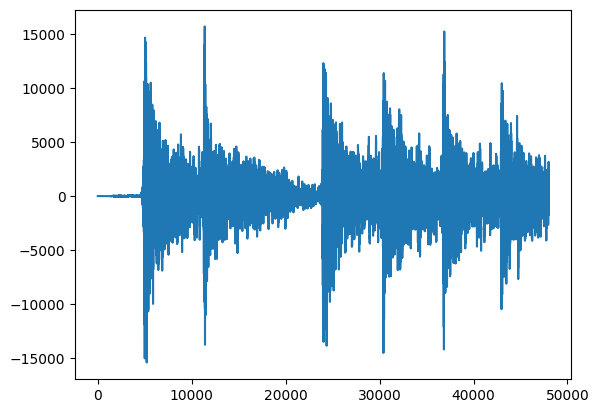

In [133]:
# plotting the first channel
signal = signal[:samplerate]
plt.plot(signal)
plt.show()

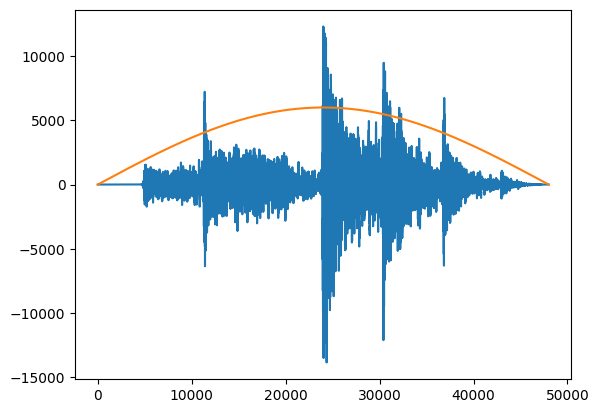

In [109]:
# hamming window
points=np.linspace(0,np.pi,samplerate)
window= np.sin(points)
signal=signal*window
plt.plot(signal)
plt.plot(window*6000)
plt.show()

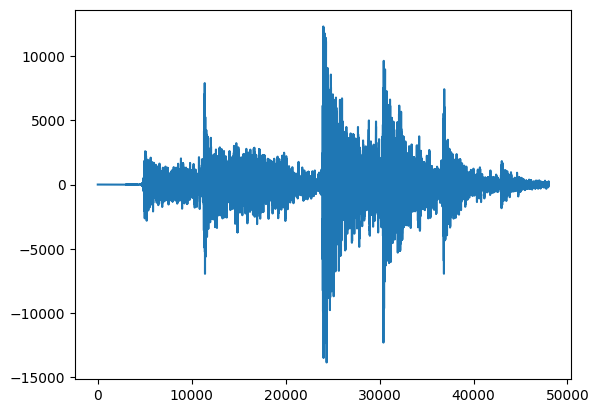

In [134]:
window_signal = np.hamming(len(signal)) * signal
plt.plot(window_signal)
plt.show()

/home/argonsodiumvanadium/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


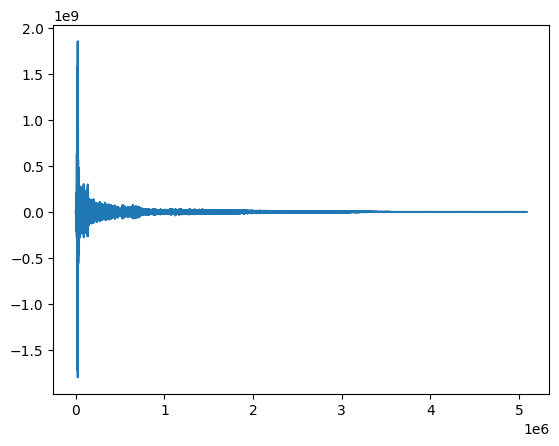

In [130]:
# doing fft on the first channel
FFT = (fft(signal))
plt.plot(presentable(FFT))
plt.show()

mel [6.9915282  6.94425946 6.02549507 ... 6.83635188 6.02549507 6.94425946]


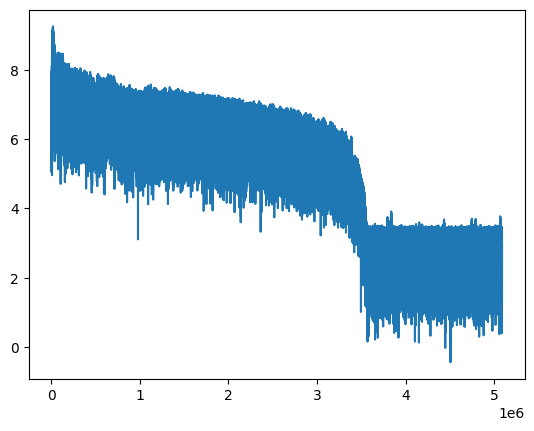

In [131]:
# scaling to the mel scale
MEL = np.log10(np.abs(FFT))
print("mel",MEL)
plt.plot(presentable(MEL))
plt.show()

5.400746270448284


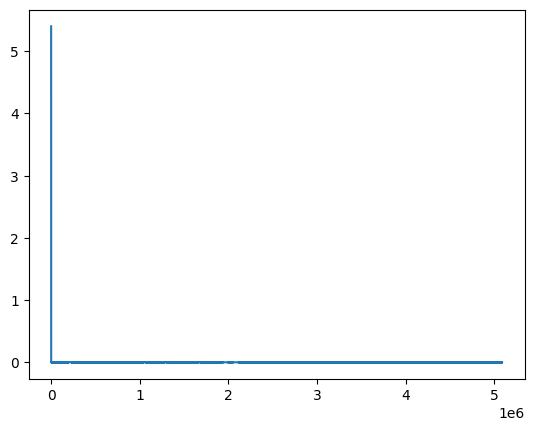

In [132]:
# doing the ifft to get the cepstrum
CEPSTRUM = ifft(MEL)
print(sorted(presentable(np.abs(CEPSTRUM)))[-1])
plt.plot(presentable(np.abs(CEPSTRUM)))
plt.show()